<div align="center">
  <h1>Drugs Project</h1>
</div>

#### Drugs Project is a method to help chemists design some compounds that could be accepted by the FDA
#### Collected the data from ChEMBL website 
#### The last update of the data was Jan 2023 and it contains 2,354,965 Compounds

## Intro 
### The drug discovery process needs almost 15 years and costs millions of euros to reach to the market
### Put photo of drug discovery timeline
## Target
### Desinging compounds that will have a high chance for FDA Approval




### Start Visualization and comments



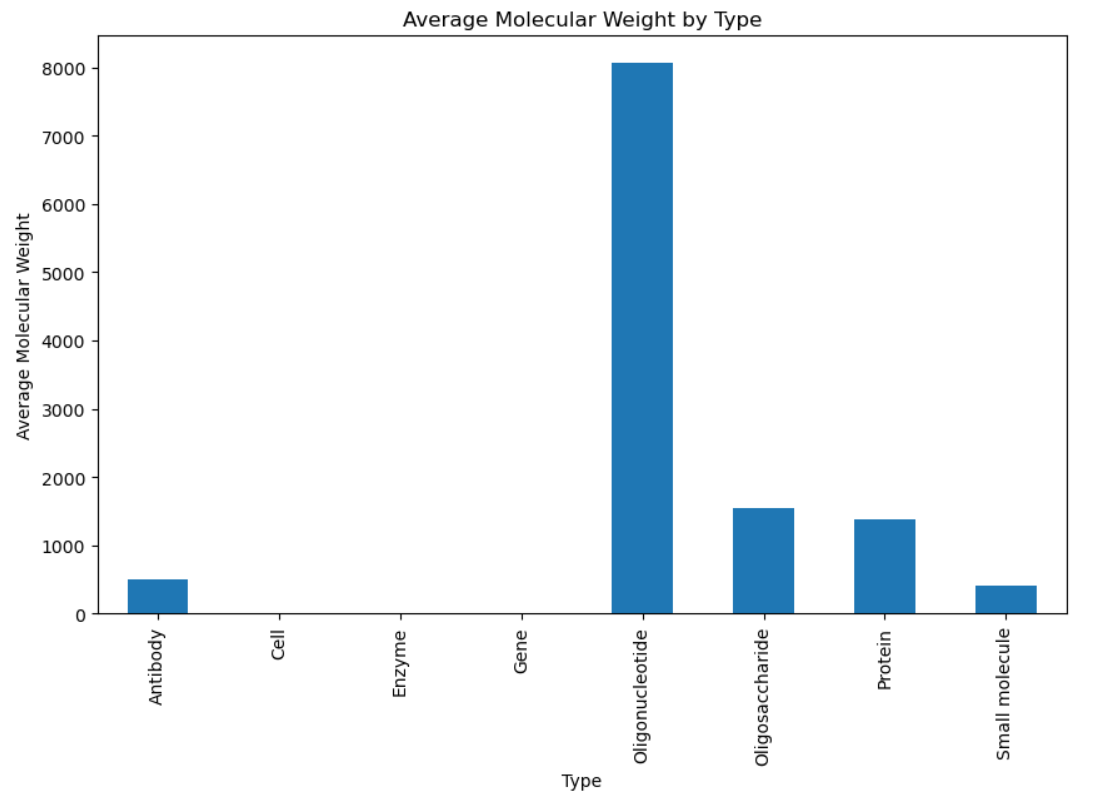

In [1]:
from IPython import display
display.Image ("/kaggle/input/graphs/Av_mwt_by_type.PNG")

#### 1. Put Bar chart of type  


##### Small Molecule has the smalles average Mwt around 418 
##### Oligonucleotide has the biggest average Mwt around 8059



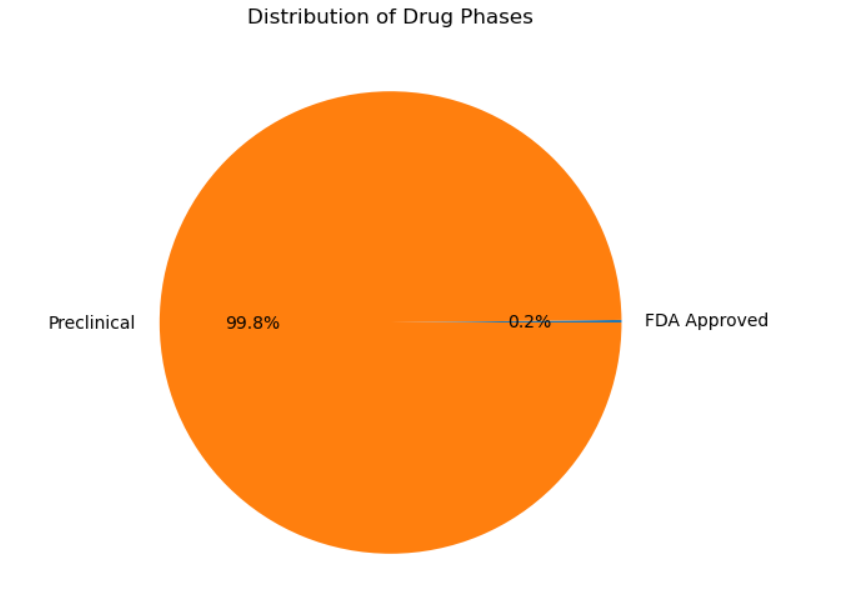

In [2]:
display.Image ("/kaggle/input/graphs/Distribution of Drug phases.PNG")

#### 2. Put Pie chart of phases  
##### 99.8% of drugs can not pass the priclinical and go to early phase 1 
##### 0.18% can pass all the phases and has the FDA 


#### 3. Average Molecular Weight

#### 4. Put pie chart of type  
##### Almost 99% are small molecle 
##### 1% are Antibody, Cell, Enzyme, Gene, Oligonucleotide, Oligosaccharide and Protein


#### 5. Put pie chart of number of Each Phase for Small Molecules  
##### 99.6% of drugs can not pass the priclinical and go to early phase 1 
##### 0.18% can pass all the phases and has the FDA 

#### 6. Put Bar chart for the Average HBD of Small Molecules by Drug Phase
##### Most of the phases has 2 HBD
##### only Early phases has 3 HBD

#### 7. Put Bar chart for the Average HBA of Small Molecules by Drug Phase
##### FDA Approved has 5 HBA
##### Priclinical and other phases have 6 

#### 8.Put Bar chart of  Avergae Mwt
##### Almost all phases has average Mwt around 400 daltons

#### 9. Put Bar chart of Average Polar Surface Area of Small Molecules by Drug Phase
##### Almost all phases has PSA around 80 

#### 10. Put Bar chart of Average CX LogD (clogP) of Small Molecules by Drug Phase
##### Most of Phase 3 and FDA Approved drugs has lower than 1 clogD

#### 11. Put Bar chart of Number of drugs that violate #RO5 for Small Molecules by Drug Phase


## Recommendation 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/kaggle/input/most-drugs/All Drugs.csv", on_bad_lines='skip') #upload all compounds CSV

In [5]:
df = pd.read_csv("/kaggle/input/most-drugs/All Drugs.csv", on_bad_lines='skip', sep=";") #Print the name of the header in the file
print(df.columns)

/tmp/ipykernel_20/1853848367.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/most-drugs/All Drugs.csv", on_bad_lines='skip', sep=";") #Print the name of the header in the file


Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key'],
      dtype='object')


In [6]:
df["Max Phase"].fillna(-1, inplace=True) #combine all priclinical together

In [7]:
df_filtered = df[df['Type'] != 'Unknown']

average_mwt_type = df_filtered.groupby('Type')['Molecular Weight'].mean() #Avergae Mwt of drugs based on the type

print(average_mwt_type)


Type
Antibody            504.450000
Cell                       NaN
Enzyme                     NaN
Gene                       NaN
Oligonucleotide    8059.125088
Oligosaccharide    1539.738372
Protein            1385.289266
Small molecule      418.470848
Name: Molecular Weight, dtype: float64


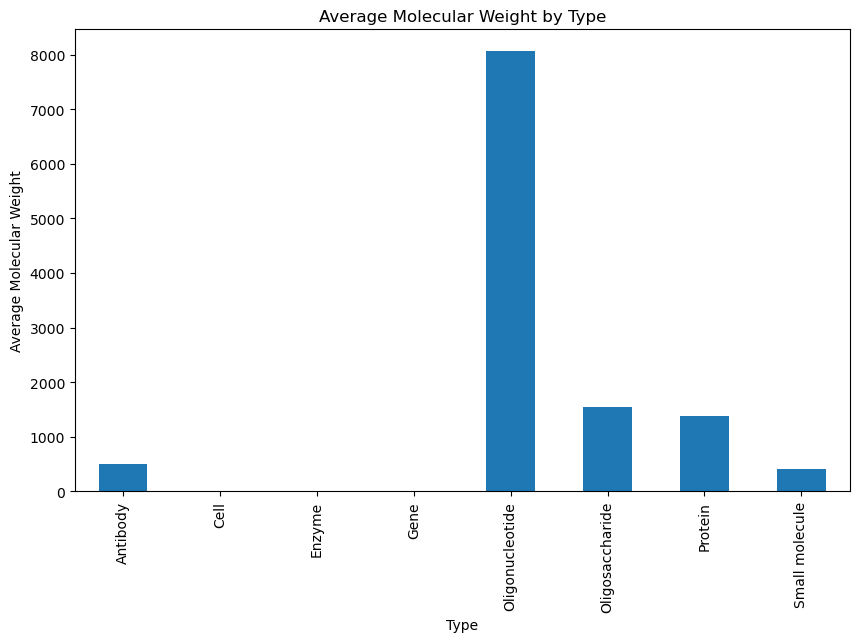

<Figure size 640x480 with 0 Axes>

In [8]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_mwt_type.plot(kind='bar')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Average Molecular Weight')
plt.title('Average Molecular Weight by Type')

# Display the chart
plt.show()

plt.savefig('Average_Molecular_Weight2.png')

# Small Molecule ha the smalles average Mwt around 418 
# Oligonucleotide has the biggest average Mwt around 8059

In [9]:
count_approved = df['Max Phase'].value_counts().get(4, 0) #count number of approved drugs
print(count_approved)
 
percentage_approved = (count_approved / len(df)) * 100   #calcualte percentage of approved drugs
print(percentage_approved)

count_phase_3 = df['Max Phase'].value_counts().get(3, 0) #count number of phase 3 drugs
print(count_phase_3)
 
percentage_phase_3 = (count_phase_3 / len(df)) * 100   #calcualte percentage of phase 3 drugs
print(percentage_phase_3)

count_phase_2 = df['Max Phase'].value_counts().get(2, 0) #count number of phase 2 drugs
print(count_phase_2)
 
percentage_phase_2 = (count_phase_2 / len(df)) * 100   #calcualte percentage of phase 2 drugs
print(percentage_phase_2)

count_phase_1 = df['Max Phase'].value_counts().get(1, 0) #count number of phase 1 drugs
print(count_phase_1)
 
percentage_phase_1 = (count_phase_1 / len(df)) * 100   #calcualte percentage of phase 1 drugs
print(percentage_phase_1)

count_early_phase_1 = df['Max Phase'].value_counts().get(0.5, 0) #count number of Early phase 1 drugs
print(count_early_phase_1)
 
percentage_early_phase_1 = (count_early_phase_1 / len(df)) * 100   #calcualte percentage of Early phase 1 drugs
print(percentage_early_phase_1)

count_pri = df['Max Phase'].value_counts().get(-1, 0) #count number of priclinical drugs
print(count_pri)
 
percentage_pri = (count_pri / len(df)) * 100   #calcualte percentage of priclinical drugs
print(percentage_pri)

4194
0.1780918187743767
1735
0.07367413103804091
2474
0.10505463987787503
1595
0.06772924438367449
29
0.0012314408069758998
2344938
99.57421872511905


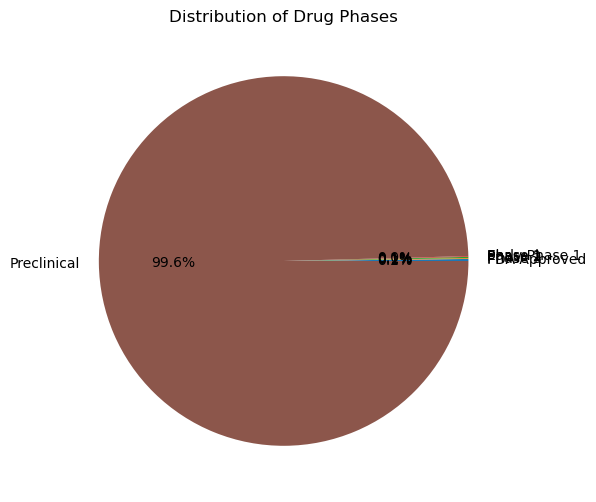

In [10]:
labels = ['FDA Approved', 'Phase 3', 'Phase 2', 'Phase 1', 'Early Phase 1', 'Preclinical']
sizes = [count_approved, count_phase_3, count_phase_2, count_phase_1, count_early_phase_1, count_pri]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Drug Phases')

# Display the chart
plt.show()
# 99.6% of drugs can not pass the priclinical and go to early phase 1 
# 0.18% can pass all the phases and has the FDA 

In [11]:
avg_mol_weight = df.groupby('Max Phase')['Molecular Weight'].mean() #Avergae Mwt of drugs based on the Phase

print(avg_mol_weight)


Max Phase
-1.0    433.736497
 0.5    443.548696
 1.0    497.091703
 2.0    482.306748
 3.0    513.281207
 4.0    448.204846
Name: Molecular Weight, dtype: float64


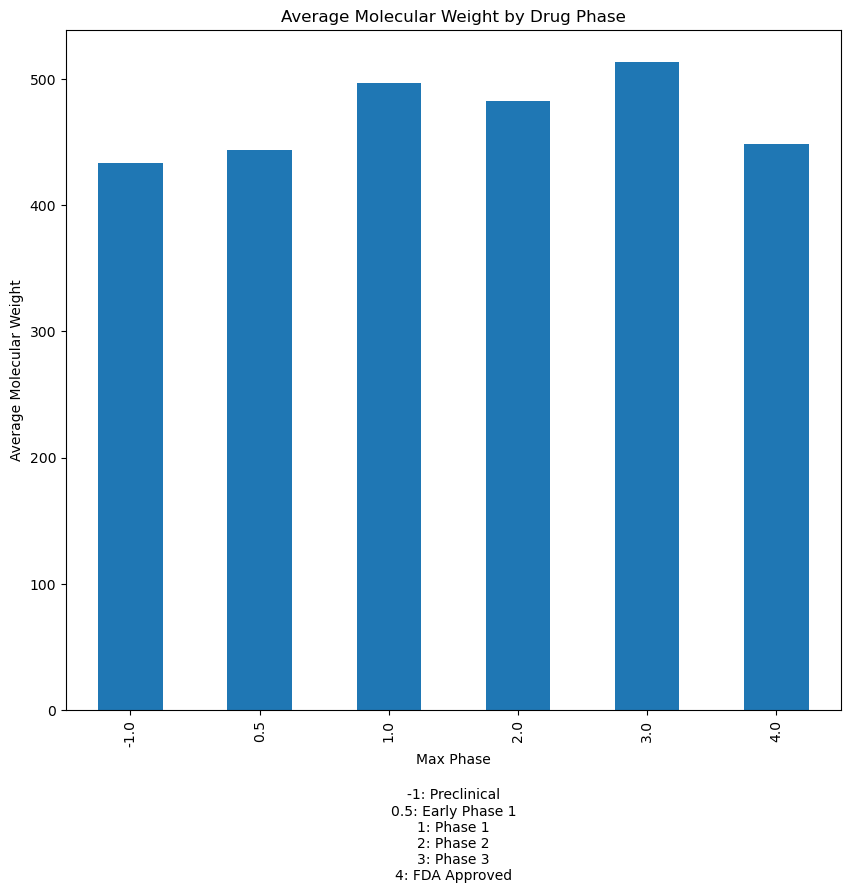

In [12]:
# Create a bar chart
plt.figure(figsize=(10, 10))
avg_mol_weight.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average Molecular Weight')
plt.title('Average Molecular Weight by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.25, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.2)

# Display the chart
plt.show()

In [13]:
df_approved = df[df['Max Phase'] == 4] #Approved drugs from FDA
print(df_approved)

             ChEMBL ID                      Name  \
795      CHEMBL1201060    LOXAPINE HYDROCHLORIDE   
2579     CHEMBL2096648                 UREA C 13   
10044    CHEMBL1200366  CEPHALEXIN HYDROCHLORIDE   
10093    CHEMBL2104136       CLOMACRAN PHOSPHATE   
10166    CHEMBL1200387       AMPHETAMINE ADIPATE   
...                ...                       ...   
2354943     CHEMBL1518          PROPYLTHIOURACIL   
2354952      CHEMBL101            PHENYLBUTAZONE   
2354955      CHEMBL530              AMDINOCILLIN   
2354956  CHEMBL1697838                 GLYMIDINE   
2354960      CHEMBL535                 SUNITINIB   

                                                  Synonyms            Type  \
795      LOXAPINE HCL|LOXAPINE HYDROCHLORIDE|LOXITANE C...  Small molecule   
2579     (13C) UREA|13-C UREA|13-C-UREA|13C-UREA|BREATH...  Small molecule   
10044    CEFALEXIN HYDROCHLORIDE|CEPHALEXIN HCL|CEPHALE...  Small molecule   
10093    CLOMACRAN PHOSPHATE|Devryl|Olaxin|SK&F 14336|S...  Sma

In [14]:
average_approved = df['Molecular Weight'].mean()#Average Mwt. of Approved drugs
print(average_approved)

433.8559150306472


In [15]:
df_pahse3 = df[df['Max Phase'] == 3] #phase 3 drugs
print(df_pahse3)

             ChEMBL ID                         Name  \
691      CHEMBL3039533                  GRAZOPREVIR   
211565   CHEMBL4297324         REMIMAZOLAM TOSYLATE   
212355   CHEMBL4297424               RUBIDIUM RB-82   
222540    CHEMBL545437      AMIBEGRON HYDROCHLORIDE   
516897   CHEMBL4297407              ALTROPANE I-123   
...                ...                          ...   
2354931  CHEMBL4298063  CILIARY NEUROTROPHIC FACTOR   
2354932  CHEMBL4298075                 PROPOLIS WAX   
2354935  CHEMBL4298085                    FIANLIMAB   
2354939  CHEMBL4298098       TUSAMITAMAB RAVTANSINE   
2354945    CHEMBL46618                   OTAMIXABAN   

                                                  Synonyms            Type  \
691                                            GRAZOPREVIR  Small molecule   
211565           REMIMAZOLAM TOSILATE|REMIMAZOLAM TOSYLATE  Small molecule   
212355   RUBIDIUM (82 RB)|RUBIDIUM (RB-82)|RUBIDIUM RB-...  Small molecule   
222540   AMIBEGRON HCL|Amib

In [16]:
df_pahse2 = df[df['Max Phase'] == 2] #Phase 2
print(df_pahse2)

             ChEMBL ID                              Name  \
10242    CHEMBL2104992              VESTIPITANT MESYLATE   
11662    CHEMBL3989805           ELZASONAN HYDROCHLORIDE   
23802    CHEMBL3989793                    SODIUM SULFIDE   
106304   CHEMBL4297390                      NM-404 I-124   
109155   CHEMBL4650282                          DS-1001B   
...                ...                               ...   
2354936  CHEMBL4298089                      CODRITUZUMAB   
2354937  CHEMBL4298090                  SIMLUKAFUSP ALFA   
2354938  CHEMBL4298095                         NIMACIMAB   
2354957  CHEMBL4650343                       IZENCITINIB   
2354964  CHEMBL4650424  SVN53-67/M57-KLH PEPTIDE VACCINE   

                                                  Synonyms            Type  \
10242    GW-597588B|GW-597599B|GW597588B|GW597599B|VEST...  Small molecule   
11662    CP-448,187-01|CP-448187-01|ELZASONAN HCL|ELZAS...  Small molecule   
23802                                       S

In [17]:
df_pahse1 = df[df['Max Phase'] == 1] #phase1
print(df_pahse1)

             ChEMBL ID                                               Name  \
9920     CHEMBL2219411                        MOMELOTINIB DIHYDROCHLORIDE   
23617    CHEMBL4297265                                            BLI-489   
160441   CHEMBL1609430                         METHOXYAMINE HYDROCHLORIDE   
198748   CHEMBL4594399                            D6-25-HYDROXYVITAMIN D3   
209494   CHEMBL5095351                               SELNOFLAST POTASSIUM   
...                ...                                                ...   
2354944       CHEMBL99                                       TRICHOSTATIN   
2354947  CHEMBL3545011                                            GS-9667   
2354949  CHEMBL1181952  1,1'-METHYLENEBIS(4-((HYDROXYIMINO)METHYL)-PYR...   
2354950  CHEMBL4650317                                        ICAPAMESPIB   
2354963  CHEMBL4650414                                           ONO-7475   

                                                  Synonyms            Type 

In [18]:
df_early_phase = df[df['Max Phase'] == 0.5] #early_phase
print(df_early_phase)

             ChEMBL ID                                               Name  \
1198227  CHEMBL4594411                       XENON XE-129, HYPERPOLARIZED   
1564963  CHEMBL1964546                                 PROFLAVINE SULFATE   
1607131   CHEMBL207456                              PITTSBURGH COMPOUND B   
2085428  CHEMBL1790180                                       ENDOTHELIN 3   
2095326  CHEMBL4297667                                  CITRULLINE MALATE   
2103477   CHEMBL476413                                     JHU-75528 C-11   
2104565  CHEMBL1185241                                       RHODAMINE 6G   
2110543     CHEMBL1740                                     RACEPINEPHRINE   
2114420    CHEMBL93124                              PITTSBURGH COMPOUND B   
2260072   CHEMBL142130                                        CYPROTERONE   
2260500    CHEMBL23194                                           SPERMINE   
2260598  CHEMBL2088033                                             NOP-1A   

In [19]:
df_priclinical = df[df['Max Phase'] == -1] # priclinical
print(df_priclinical)

             ChEMBL ID          Name  \
0        CHEMBL2332669           NaN   
1        CHEMBL1254582           NaN   
2        CHEMBL1422011           NaN   
3        CHEMBL1384184           NaN   
4        CHEMBL1870873           NaN   
...                ...           ...   
2354954  CHEMBL2109090     ENLIMOMAB   
2354958  CHEMBL1187694   QUIFENADINE   
2354959  CHEMBL2109114  BOROGLYCERIN   
2354961  CHEMBL1191989    FLUTIZENOL   
2354962  CHEMBL1192237  ZINOCONAZOLE   

                                                  Synonyms            Type  \
0                                                      NaN  Small molecule   
1                                                      NaN  Small molecule   
2                                                      NaN  Small molecule   
3                                                      NaN  Small molecule   
4                                                      NaN  Small molecule   
...                                                

In [20]:
grouped = df.groupby("Max Phase")["Max Phase"].value_counts()  #Total number of each pahse, -1 priclinical, 0.5 early phase, 1,2 and 3 are phase, 4 approved
print(grouped)

Max Phase  Max Phase
-1.0       -1.0         2344938
 0.5        0.5              29
 1.0        1.0            1595
 2.0        2.0            2474
 3.0        3.0            1735
 4.0        4.0            4194
Name: Max Phase, dtype: int64


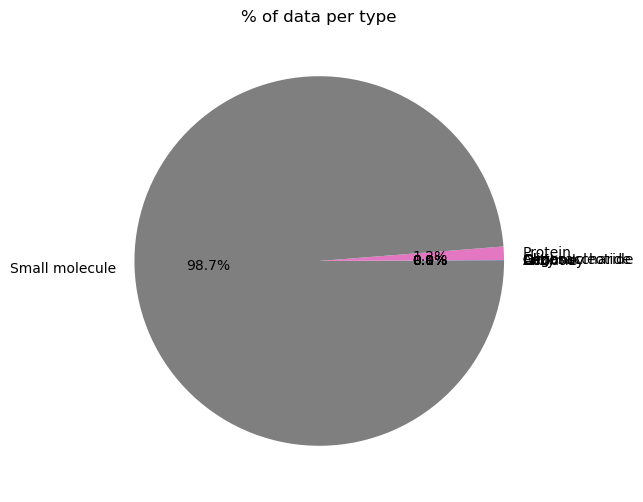

In [21]:
grouped = df[df['Type'] != 'Unknown'].groupby('Type')['Type'].count()

# Create a pie chart
plt.figure(figsize=(8, 6))
grouped = grouped[grouped.index != 'Unknown']  # Exclude 'unknown' group
grouped.plot(kind='pie', autopct='%1.1f%%')

# Add labels and title
plt.ylabel('')
plt.title('% of data per type')

# Display the chart
plt.show()

# Almost 99% are small molecle 
# 1% are Antibody, Cell, Enzyme, Gene, Oligonucleotide, Oligosaccharide and Protein

In [22]:
df_small_drugs = df[df['Type'] == 'Small molecule'] #small drugs
print(df_small_drugs)

             ChEMBL ID          Name  \
0        CHEMBL2332669           NaN   
1        CHEMBL1254582           NaN   
2        CHEMBL1422011           NaN   
3        CHEMBL1384184           NaN   
4        CHEMBL1870873           NaN   
...                ...           ...   
2354957  CHEMBL4650343   IZENCITINIB   
2354958  CHEMBL1187694   QUIFENADINE   
2354960      CHEMBL535     SUNITINIB   
2354961  CHEMBL1191989    FLUTIZENOL   
2354962  CHEMBL1192237  ZINOCONAZOLE   

                                                  Synonyms            Type  \
0                                                      NaN  Small molecule   
1                                                      NaN  Small molecule   
2                                                      NaN  Small molecule   
3                                                      NaN  Small molecule   
4                                                      NaN  Small molecule   
...                                                

In [23]:
no_small_phase = df.groupby('Max Phase')['Type'].count() #number of each phase for small molecule

print(no_small_phase)

Max Phase
-1.0    2344938
 0.5         29
 1.0       1595
 2.0       2474
 3.0       1735
 4.0       4194
Name: Type, dtype: int64


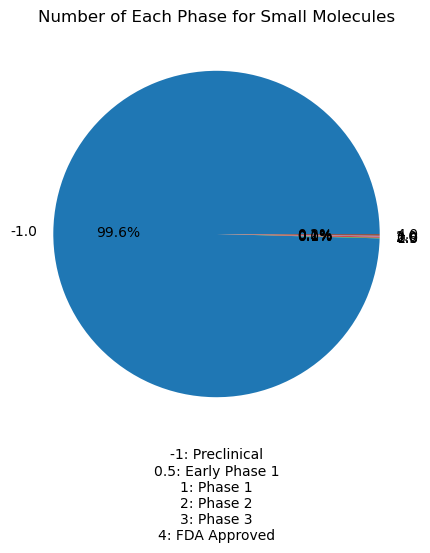

In [24]:
# Create a pie chart
plt.figure(figsize=(8, 6))
no_small_phase.plot(kind='pie', autopct='%1.1f%%')

# Add labels and title
plt.ylabel('')
plt.title('Number of Each Phase for Small Molecules')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.25, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.2)

# Display the chart
plt.show()

# 99.6% of drugs can not pass the priclinical and go to early phase 1 
# 0.18% can pass all the phases and has the FDA 

In [25]:
average_mwt_small_molecule = df_small_drugs['Molecular Weight'].mean() #Avergae Mwt of small drugs
print(average_mwt_small_molecule)

418.4708480606633


In [26]:
max_mwt_small_molecule = df_small_drugs['Molecular Weight'].max() #Max Mwt of small drugs
print(max_mwt_small_molecule)

12546.32


In [27]:
min_mwt_small_molecule = df_small_drugs['Molecular Weight'].min() #Min Mwt of small drugs
print(min_mwt_small_molecule)

4.0


In [28]:
min_mwt_small_molecule = df_small_drugs['Molecular Weight'].min() #row of the minimum Mwt in small molecule
df_min_mwt = df_small_drugs[df_small_drugs['Molecular Weight'] == min_mwt_small_molecule]
print(df_min_mwt)

             ChEMBL ID    Name                                       Synonyms  \
2259169  CHEMBL1796997  HELIUM  E-939|E939|HELIUM|HELIUM-4|INS NO.939|INS-939   

                   Type  Max Phase  Molecular Weight  Targets  Bioactivities  \
2259169  Small molecule        4.0               4.0      1.0            3.0   

        AlogP Polar Surface Area  ... Heavy Atoms HBA (Lipinski)  \
2259169  None               None  ...        None           None   

        HBD (Lipinski) #RO5 Violations (Lipinski)  \
2259169           None                       None   

        Molecular Weight (Monoisotopic) Np Likeness Score Molecular Species  \
2259169                          4.0026              None              None   

        Molecular Formula Smiles                    Inchi Key  
2259169                He   [He]  SWQJXJOGLNCZEY-UHFFFAOYSA-N  

[1 rows x 33 columns]


In [29]:
df['HBD (Lipinski)'] = pd.to_numeric(df['HBD (Lipinski)'], errors='coerce') 
average_hbd_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['HBD (Lipinski)'].mean().round().astype(int) #avergae HBD of small molecule for each phase

print(average_hbd_phases)

Max Phase
-1.0    2
 0.5    3
 1.0    2
 2.0    2
 3.0    2
 4.0    2
Name: HBD (Lipinski), dtype: int64


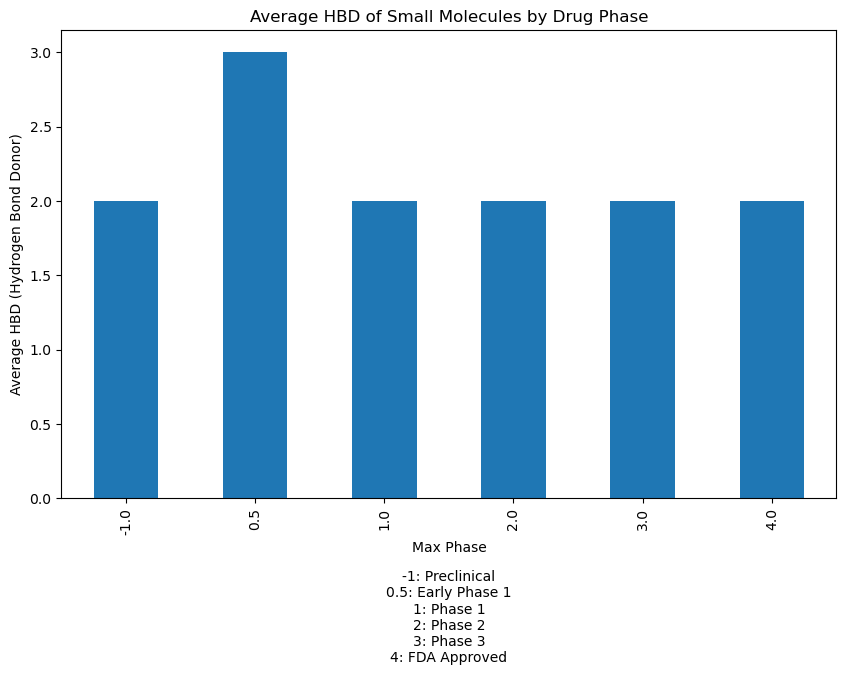

In [30]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_hbd_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average HBD (Hydrogen Bond Donor)')
plt.title('Average HBD of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# almost all phases has 2 HBD

In [31]:
df['HBA (Lipinski)'] = pd.to_numeric(df['HBA (Lipinski)'], errors='coerce') 
average_hba_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['HBA (Lipinski)'].mean().astype(int) #avergae HBA of small molecule for each phase
print(average_hba_phases)

Max Phase
-1.0    6
 0.5    4
 1.0    7
 2.0    6
 3.0    6
 4.0    5
Name: HBA (Lipinski), dtype: int64


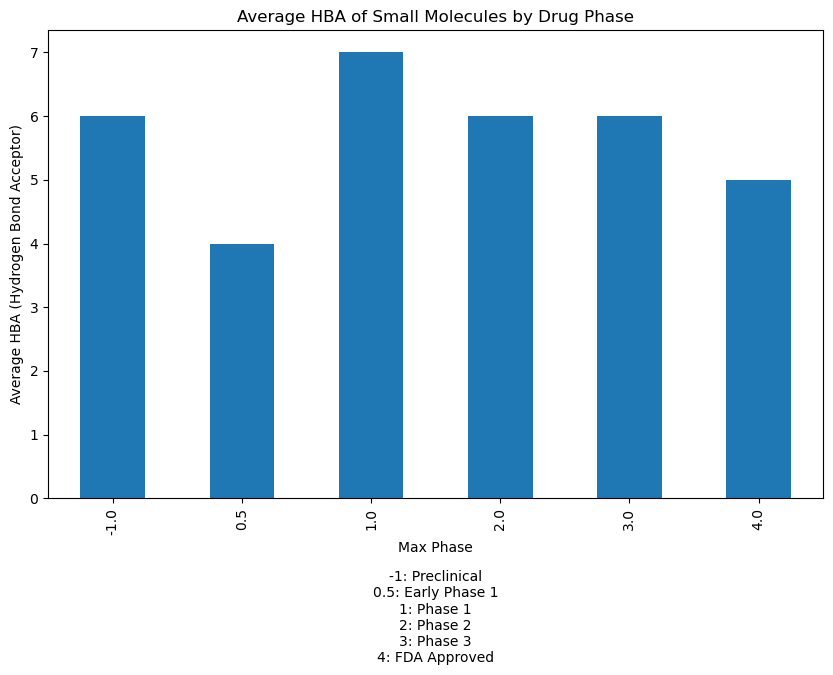

In [32]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_hba_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average HBA (Hydrogen Bond Acceptor)')
plt.title('Average HBA of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()
# FDA Approved has 5 HBA
# Priclinical and other phases have 6 

In [33]:
average_mwt_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['Molecular Weight'].mean() #avergae Mwt of small molecule for each phase
print(average_mwt_phases)

Max Phase
-1.0    418.479676
 0.5    297.771429
 1.0    441.580890
 2.0    433.428695
 3.0    409.697898
 4.0    404.846308
Name: Molecular Weight, dtype: float64


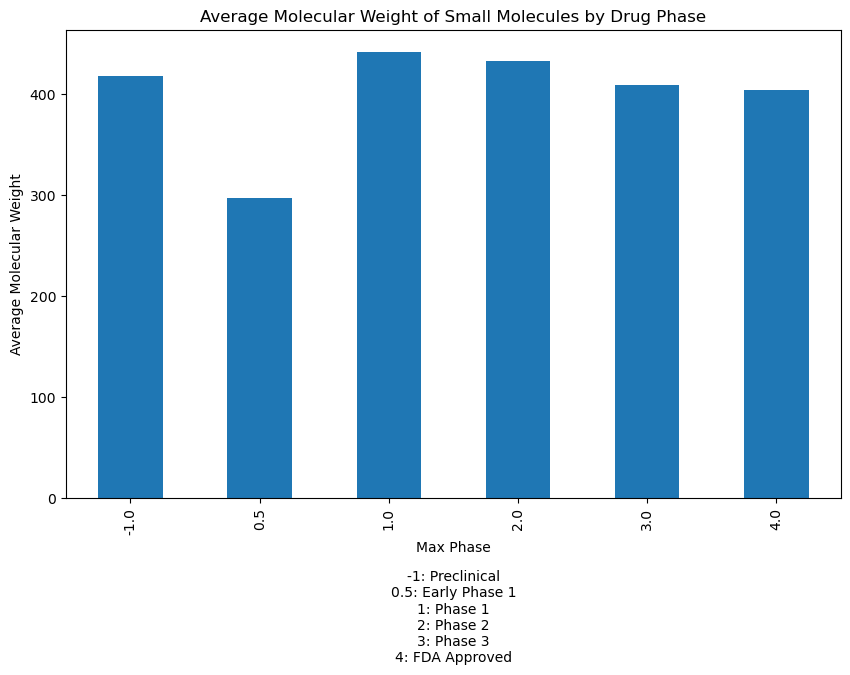

In [34]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_mwt_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average Molecular Weight')
plt.title('Average Molecular Weight of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# Almost all phases has average Mwt around 400 daltons

In [35]:
# Convert "clogP" column to numeric
df['CX LogD'] = pd.to_numeric(df['CX LogD'], errors='coerce')

clogP_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['CX LogD'].mean() #Number of small molecule that violate rule of 5 for each phase
print(clogP_phases)

Max Phase
-1.0    2.522817
 0.5    0.235000
 1.0    1.932574
 2.0    1.790880
 3.0    0.936775
 4.0    0.849637
Name: CX LogD, dtype: float64


In [36]:
# Convert "Polar Surface Area" column to numeric
df['Polar Surface Area'] = pd.to_numeric(df['Polar Surface Area'], errors='coerce')

average_PSA_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['Polar Surface Area'].mean() #avergae PSA for each phase of small molecule

print(average_PSA_phases)


Max Phase
-1.0    81.467383
 0.5    75.595500
 1.0    93.035854
 2.0    90.072422
 3.0    93.627230
 4.0    78.072112
Name: Polar Surface Area, dtype: float64


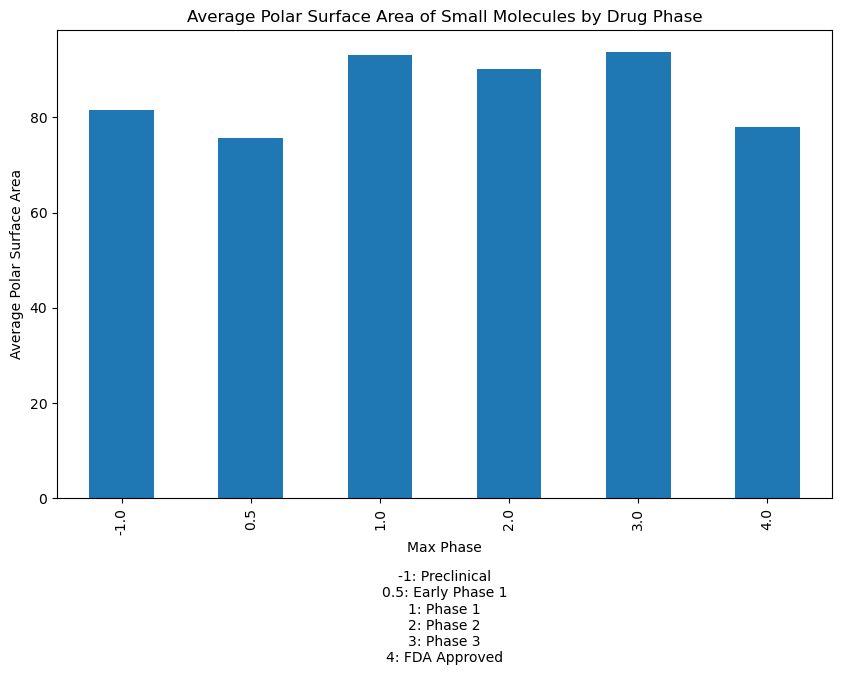

In [37]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_PSA_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average Polar Surface Area')
plt.title('Average Polar Surface Area of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()


# Almost all phases has PSA around 80 

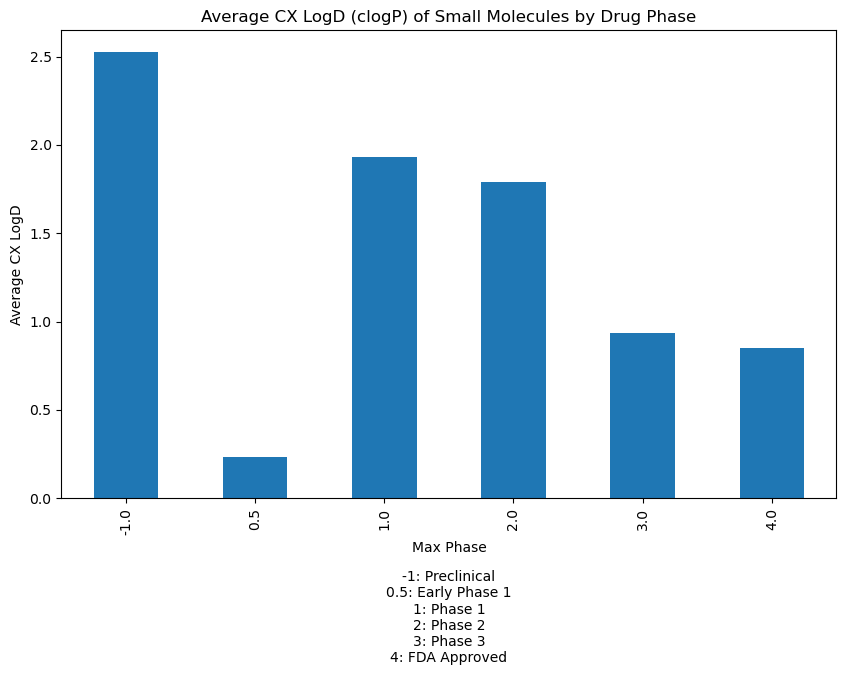

In [38]:
# Create a bar chart
plt.figure(figsize=(10, 6))
clogP_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average CX LogD')
plt.title('Average CX LogD (clogP) of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# Most of Phase 3 and FDA Approved drugs has lower than 1 clogP

In [39]:
RO5_vio_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['#RO5 Violations (Lipinski)'].count() #Number of small molecule that violate rule of 5 for each phase
print(RO5_vio_phases)

Max Phase
-1.0    1911522
 0.5         21
 1.0        843
 2.0       1571
 3.0       1061
 4.0       3524
Name: #RO5 Violations (Lipinski), dtype: int64


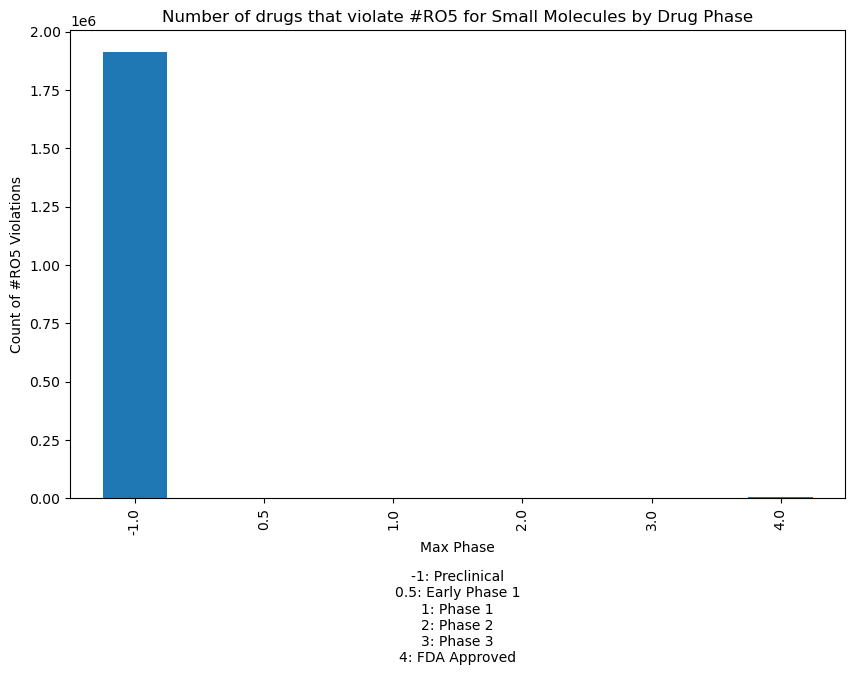

In [40]:
# Create a bar chart
plt.figure(figsize=(10, 6))
RO5_vio_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Count of #RO5 Violations')
plt.title('Number of drugs that violate #RO5 for Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# 99% has at least 1 violation to Lib RO5